In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, accuracy_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("menstrual_cycle_dataset_with_factors.csv")

In [4]:
df.head(10)

,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,Next Cycle Start Date,Symptoms
0,1,18,29.28,2,Moderate,5.4,Low Carb,2024-11-13 20:52:34.915012,26,7,2024-12-09 20:52:34.915012,Headache
1,1,18,29.28,2,Moderate,5.4,Low Carb,2024-12-09 20:52:34.915012,32,5,2025-01-10 20:52:34.915012,Fatigue
2,1,18,29.28,2,Moderate,5.4,Low Carb,2025-01-10 20:52:34.915012,41,7,2025-02-20 20:52:34.915012,Fatigue
3,1,18,29.28,2,Moderate,5.4,Low Carb,2025-02-20 20:52:34.915012,27,3,2025-03-19 20:52:34.915012,Fatigue
4,1,18,29.28,2,Moderate,5.4,Low Carb,2025-03-19 20:52:34.915012,42,5,2025-04-30 20:52:34.915012,Cramps
5,1,18,29.28,2,Moderate,5.4,Low Carb,2025-04-30 20:52:34.915012,41,5,2025-06-10 20:52:34.915012,Fatigue
6,1,18,29.28,2,Moderate,5.4,Low Carb,2025-06-10 20:52:34.915012,31,4,2025-07-11 20:52:34.915012,Headache
7,1,18,29.28,2,Moderate,5.4,Low Carb,2025-07-11 20:52:34.915012,48,7,2025-08-28 20:52:34.915012,Fatigue
8,1,18,29.28,2,Moderate,5.4,Low Carb,2025-08-28 20:52:34.915012,29,3,2025-09-26 20:52:34.915012,Fatigue
9,1,18,29.28,2,Moderate,5.4,Low Carb,2025-09-26 20:52:34.915012,47,4,2025-11-12 20:52:34.915012,Headache


In [5]:
df.columns

Index(['User ID', 'Age', 'BMI', 'Stress Level', 'Exercise Frequency',
       'Sleep Hours', 'Diet', 'Cycle Start Date', 'Cycle Length',
       'Period Length', 'Next Cycle Start Date', 'Symptoms'],
      dtype='object')

In [6]:
df['Symptoms'].value_counts()

Symptoms
Bloating       204
Fatigue        178
Cramps         177
Headache       175
Mood Swings    161
Name: count, dtype: int64

In [7]:
df["Stress Level"].value_counts()

Stress Level
4    227
5    184
1    183
2    158
3    143
Name: count, dtype: int64

In [8]:
df["Diet"].value_counts()

Diet
Vegetarian    268
Balanced      258
Low Carb      200
High Sugar    169
Name: count, dtype: int64

In [9]:
df['Exercise Frequency'].value_counts()

Exercise Frequency
High        361
Moderate    280
Low         254
Name: count, dtype: int64

In [10]:
df["Diet"].value_counts()

Diet
Vegetarian    268
Balanced      258
Low Carb      200
High Sugar    169
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                895 non-null    int64  
 1   Age                    895 non-null    int64  
 2   BMI                    895 non-null    float64
 3   Stress Level           895 non-null    int64  
 4   Exercise Frequency     895 non-null    object 
 5   Sleep Hours            895 non-null    float64
 6   Diet                   895 non-null    object 
 7   Cycle Start Date       895 non-null    object 
 8   Cycle Length           895 non-null    int64  
 9   Period Length          895 non-null    int64  
 10  Next Cycle Start Date  895 non-null    object 
 11  Symptoms               895 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.0+ KB


In [12]:
df.isnull().sum()

User ID                  0
Age                      0
BMI                      0
Stress Level             0
Exercise Frequency       0
Sleep Hours              0
Diet                     0
Cycle Start Date         0
Cycle Length             0
Period Length            0
Next Cycle Start Date    0
Symptoms                 0
dtype: int64

In [13]:
df["Cycle Start Date"] = pd.to_datetime(df["Cycle Start Date"])
df["Next Cycle Start Date"] = pd.to_datetime(df["Next Cycle Start Date"])

In [14]:
df["Actual Cycle Length"] = (df["Next Cycle Start Date"] - df["Cycle Start Date"]).dt.days

In [15]:
print(df["Actual Cycle Length"].describe())
print(f"Number of unique cycle lengths: {df['Actual Cycle Length'].nunique()}")
print(f"Value counts:\n{df['Actual Cycle Length'].value_counts().sort_index()}")

count    895.000000
mean      37.373184
std        7.465008
min       25.000000
25%       31.000000
50%       37.000000
75%       43.000000
max       50.000000
Name: Actual Cycle Length, dtype: float64
Number of unique cycle lengths: 26
Value counts:
Actual Cycle Length
25    32
26    42
27    28
28    34
29    37
30    29
31    40
32    38
33    36
34    36
35    40
36    30
37    27
38    41
39    30
40    43
41    26
42    49
43    34
44    22
45    33
46    31
47    31
48    39
49    33
50    34
Name: count, dtype: int64


In [16]:
df["Cycle Start Month"] = df["Cycle Start Date"].dt.month
df["Cycle Start DayOfWeek"] = df["Cycle Start Date"].dt.dayofweek
df["Cycle Start DayOfYear"] = df["Cycle Start Date"].dt.dayofyear
df['Cycle Start Month_sin'] = np.sin(2 * np.pi * df['Cycle Start Month'] / 12)
df['Cycle Start Month_cos'] = np.cos(2 * np.pi * df['Cycle Start Month'] / 12)
df['Cycle_Length_Rolling_Avg'] = df.groupby('User ID')['Actual Cycle Length'].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
df['Is_Winter'] = df['Cycle Start Month'].isin([12, 1, 2]).astype(int)
df['Is_Spring'] = df['Cycle Start Month'].isin([3, 4, 5]).astype(int)
df['Is_Summer'] = df['Cycle Start Month'].isin([6, 7, 8]).astype(int)
df['Is_Fall'] = df['Cycle Start Month'].isin([9, 10, 11]).astype(int)


In [17]:
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 20, 40, 50, 70], labels=[0, 1, 2, 7])

In [18]:
df["BMI_Category"] = pd.cut(df["BMI"], bins=[0, 18.5, 25, 70, 100], 
                           labels=["Underweight", "Normal", "Overweight", "Obese"])


In [19]:
label_cols = ["Exercise Frequency", "Diet", "Symptoms", "BMI_Category"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
feature_columns = [
    "Age", "BMI", "Stress Level", "Exercise Frequency",
    "Sleep Hours", "Diet", "Period Length", 
    "Symptoms", "Cycle Start Month", "Cycle Start DayOfWeek",
    "Age_Group", "BMI_Category","Cycle Start Month_sin", "Cycle Start Month_cos",
    "Cycle_Length_Rolling_Avg","Is_Winter", "Is_Spring", "Is_Summer", "Is_Fall"]

In [21]:
df.head()

,User ID,Age,BMI,Stress Level,Exercise Frequency,Sleep Hours,Diet,Cycle Start Date,Cycle Length,Period Length,...,Cycle Start DayOfYear,Cycle Start Month_sin,Cycle Start Month_cos,Cycle_Length_Rolling_Avg,Is_Winter,Is_Spring,Is_Summer,Is_Fall,Age_Group,BMI_Category
0,1,18,29.28,2,2,5.4,2,2024-11-13 20:52:34.915012,26,7,...,318,-5.000000e-01,8.660254e-01,26.000000,0,0,0,1,0,1
1,1,18,29.28,2,2,5.4,2,2024-12-09 20:52:34.915012,32,5,...,344,-2.449294e-16,1.000000e+00,29.000000,1,0,0,0,0,1
2,1,18,29.28,2,2,5.4,2,2025-01-10 20:52:34.915012,41,7,...,10,5.000000e-01,8.660254e-01,33.000000,1,0,0,0,0,1
3,1,18,29.28,2,2,5.4,2,2025-02-20 20:52:34.915012,27,3,...,51,8.660254e-01,5.000000e-01,33.333333,1,0,0,0,0,1
4,1,18,29.28,2,2,5.4,2,2025-03-19 20:52:34.915012,42,5,...,78,1.000000e+00,6.123234e-17,36.666667,0,1,0,0,0,1


In [22]:
X = df[feature_columns]
y = df["Actual Cycle Length"]

In [23]:
print(f"\n🎯 TARGET DISTRIBUTION:")
print(f"Target mean: {y.mean():.2f}")
print(f"Target std: {y.std():.2f}")
print(f"Target min: {y.min()}")
print(f"Target max: {y.max()}")


🎯 TARGET DISTRIBUTION:
Target mean: 37.37
Target std: 7.47
Target min: 25
Target max: 50


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
print(f"\n📊 DATA SPLIT:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


📊 DATA SPLIT:
Training set: 716 samples
Test set: 179 samples


In [26]:
numerical_features = ["Age", "BMI","Stress Level", "Sleep Hours", "Period Length"]
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

In [27]:
def evaluate_models(X_train, X_test, y_train, y_test):
    """Evaluate multiple models and return the best one"""
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=1.0)
    }
    
    best_accuracy = 0
    best_model = None
    best_model_name = None
    
    print("🔍 MODEL COMPARISON:")
    print("=" * 50)
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Predict
        y_pred = model.predict(X_test)
        
        # ✅ CORRECTED: Calculate accuracy within 7 days
        differences = np.abs(y_test - y_pred)
        accuracy_within_7_days = (differences <= 7).mean()  # Percentage within 7 days
        
        # Calculate MSE and average error
        mse = mean_squared_error(y_test, y_pred)
        avg_error = differences.mean()
        
        print(f"{name}:")
        print(f"  Accuracy within 7 days: {accuracy_within_7_days:.1%}")
        print(f"  MSE: {mse:.2f}")
        print(f"  Avg Error: {avg_error:.2f} days")
        print(f"  Max Error: {differences.max():.2f} days")
        print(f"  Min Error: {differences.min():.2f} days")
        
        # Track best model
        if accuracy_within_7_days > best_accuracy:
            best_accuracy = accuracy_within_7_days
            best_model = model
            best_model_name = name
    
    print("=" * 50)
    print(f"🏆 BEST MODEL: {best_model_name} with {best_accuracy:.1%} accuracy")
    
    return best_model, best_model_name

In [28]:

best_model, best_model_name = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

print("\n" + "="*60)
print("🔍 DETAILED DEBUG FOR BEST MODEL:")
print("="*60)


🔍 MODEL COMPARISON:
Linear Regression:
  Accuracy within 7 days: 80.4%
  MSE: 29.40
  Avg Error: 4.21 days
  Max Error: 14.93 days
  Min Error: 0.03 days
Random Forest:
  Accuracy within 7 days: 74.9%
  MSE: 37.97
  Avg Error: 4.82 days
  Max Error: 17.02 days
  Min Error: 0.13 days
SVR:
  Accuracy within 7 days: 79.9%
  MSE: 28.17
  Avg Error: 4.12 days
  Max Error: 14.05 days
  Min Error: 0.00 days
🏆 BEST MODEL: Linear Regression with 80.4% accuracy

🔍 DETAILED DEBUG FOR BEST MODEL:


In [29]:
def scale_numerical_features(df, scaler):
    """
    Scale numerical features using the trained scaler - FIXED VERSION
    """
    df = df.copy()
    
    numerical_features = ["Age", "BMI", "Stress Level", "Sleep Hours", "Period Length"]
    
    # Check if all numerical features are present
    missing_numerical = [f for f in numerical_features if f not in df.columns]
    if missing_numerical:
        return df
    
    # Extract ALL numerical features at once and scale them together
    numerical_data = df[numerical_features]
    scaled_data = scaler.transform(numerical_data)
    
    # Put the scaled values back into the DataFrame
    for i, feature in enumerate(numerical_features):
        df[feature] = scaled_data[:, i]
    
    return df

In [30]:
def generate_reason(row):
    """
    Analyze user parameters and provide reasons that may affect the menstrual cycle.
    """
    reasons = []
    age = row["Age"]
    if age < 18:
        reasons.append("Teen years often involve hormonal fluctuations as cycles establish")
    elif age >= 18 and age <= 25:
        reasons.append("Young adulthood typically has stable hormonal patterns")
    elif age > 25 and age <= 35:
        reasons.append("Prime reproductive years with generally stable hormones")
    elif age > 35 and age <= 45:
        reasons.append("Perimenopausal phase may cause hormonal variations")
    elif age > 45:
        reasons.append("Menopausal transition involves significant hormonal changes")

    # Stress (assuming scale 1-5)
    if row["Stress Level"] >= 4:
        reasons.append("High stress levels can disrupt hormonal balance")
    elif row["Stress Level"] <= 2:
        reasons.append("Low stress levels promote hormonal regularity")
    
    # Sleep
    if row["Sleep Hours"] < 7:
        reasons.append("Insufficient sleep may affect cycle regularity")
    elif row["Sleep Hours"] > 9:
        reasons.append("Excessive sleep could indicate hormonal imbalances")

    # BMI
    if row["BMI"] < 18.5:
        reasons.append("Low BMI may cause irregular periods")
    elif row["BMI"] > 25:
        reasons.append("High BMI can cause hormonal changes")

    # Exercise (assuming encoded: 0=Low, 1=Moderate, 2=High)
    if row["Exercise Frequency"] == 0:  # Low
        reasons.append("Low activity may lead to hormonal fluctuations")
    elif row["Exercise Frequency"] == 2:  # High
        reasons.append("High exercise intensity can affect cycle timing")

    # Diet (assuming encoded: 0=Vegetarian, 1=Balanced, 2=Low Carb, 3=High Sugar)
    if row["Diet"] == 3:  # High Sugar
        reasons.append("High sugar diet may impact hormonal balance")
    elif row["Diet"] == 1:  # Balanced
        reasons.append("Balanced diet supports reproductive health")

    if not reasons:
        return "Your health parameters appear stable and supportive of regular cycles."
    else:
        return "Factors that may influence your cycle:\n- " + "\n- ".join(reasons)

In [31]:
def generate_insights(predicted_days, actual_mean=28):
    """
    Provide meaningful interpretation of the prediction.
    """
    insights = []
    diff = predicted_days - actual_mean

    if diff > 7:
        insights.append(f"Predicted cycle ({predicted_days} days) is longer than average ({actual_mean} days)")
        insights.append("Longer cycles can be influenced by stress, diet, or hormonal changes")
    elif diff < -7:
        insights.append(f"Predicted cycle ({predicted_days} days) is shorter than average ({actual_mean} days)")
        insights.append("Shorter cycles may relate to lifestyle factors or natural variation")
    else:
        insights.append(f"Predicted cycle ({predicted_days} days) is within normal range")
        insights.append("Your cycle appears regular based on current health parameters")

    insights.append("Maintain consistent sleep, nutrition, and stress management for cycle regularity")
    return "\n".join(insights)

In [32]:
def encode_categorical_features(df, label_encoders):
    """
    Encode categorical features using the trained label encoders
    """
    df = df.copy()
    
    categorical_columns = ["Exercise Frequency", "Diet", "Symptoms", "BMI_Category"]
    
    for col in categorical_columns:
        if col in df.columns:
            try:
                # Get original value
                original_value = df[col].iloc[0]
                
                # Handle unseen labels
                if original_value not in label_encoders[col].classes_:
                    # Use the most common category as default
                    default_value = label_encoders[col].classes_[0]
                    df[col] = default_value
                else:
                    # Transform the value
                    df[col] = label_encoders[col].transform([original_value])[0]
                
                
            except Exception as e:
                # Fallback: use the first available category
                default_value = label_encoders[col].classes_[0]
                df[col] = label_encoders[col].transform([default_value])[0]
    
    return df

In [33]:
def apply_feature_engineering(df):
    """
    Apply all the same feature engineering used during training - FIXED VERSION
    """
    df = df.copy()
    
    # Ensure Cycle Start Date is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['Cycle Start Date']):
        df['Cycle Start Date'] = pd.to_datetime(df['Cycle Start Date'])
    
    
    # Date features - ONLY use the ones that were in your training
    df['Cycle Start Month'] = df['Cycle Start Date'].dt.month
    df['Cycle Start DayOfWeek'] = df['Cycle Start Date'].dt.dayofweek
    


    
    # Age grouping
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], 
                            labels=[0, 1, 2, 3, 4])
    
    # BMI categorization
    conditions = [
        (df['BMI'] < 18.5),
        (df['BMI'] < 25),
        (df['BMI'] < 30),
        (df['BMI'] >= 30)
    ]
    choices = ["Underweight", "Normal", "Overweight", "Obese"]
    df['BMI_Category'] = np.select(conditions, choices, default="Normal")
    
    # Enhanced features (ONLY the ones that were in your training)
    df['Cycle Start Month_sin'] = np.sin(2 * np.pi * df['Cycle Start Month'] / 12)
    df['Cycle Start Month_cos'] = np.cos(2 * np.pi * df['Cycle Start Month'] / 12)
    df['Is_Winter'] = df['Cycle Start Month'].isin([12, 1, 2]).astype(int)
    df['Is_Spring'] = df['Cycle Start Month'].isin([3, 4, 5]).astype(int)
    df['Is_Summer'] = df['Cycle Start Month'].isin([6, 7, 8]).astype(int)
    df['Is_Fall'] = df['Cycle Start Month'].isin([9, 10, 11]).astype(int)
    
    # For single prediction, we can't calculate rolling average, so use a default

   

    
    return df

In [34]:
def predict_next_cycle(user_df, model, scaler, label_encoders):
    """
    Enhanced prediction function that works with the user DataFrame - FIXED VERSION
    """
    print(f"\n📊 Processing your input data...")
    
    # Apply all the same feature engineering as your training data
    user_df_processed = apply_feature_engineering(user_df)
    
    # Prepare features for prediction - MATCH EXACTLY what was used in training
    feature_columns = [
        "Age", "BMI", "Stress Level", "Exercise Frequency",
        "Sleep Hours", "Diet", "Period Length", 
        "Symptoms", "Cycle Start Month", "Cycle Start DayOfWeek",
        "Age_Group", "BMI_Category", "Cycle Start Month_sin", "Cycle Start Month_cos",
        "Cycle_Length_Rolling_Avg", "Is_Winter", "Is_Spring", "Is_Summer", "Is_Fall"
    ]
    
    # Check if all required features are present
    missing_features = [f for f in feature_columns if f not in user_df_processed.columns]
    if missing_features:
        print(f"❌ Missing features: {missing_features}")
        return None
    
    # Check for extra features that weren't in training
    extra_features = [f for f in user_df_processed.columns if f in user_df_processed.columns and f not in feature_columns and f not in ['Cycle Start Date', 'User ID']]
    if extra_features:
        print(f"⚠️  Extra features detected (will be ignored): {extra_features}")
    
    
    
    # Encode categorical variables
    user_df_encoded = encode_categorical_features(user_df_processed, label_encoders)
    
    # Scale numerical features
    user_df_scaled = scale_numerical_features(user_df_encoded, scaler)
    
    # Make prediction
    try:
        # Ensure we have the right features in the right order
        prediction_features = user_df_scaled[feature_columns]

        
        predicted_cycle_length = model.predict(prediction_features)[0]
        
        # Calculate next cycle date
        cycle_start_date = user_df_processed['Cycle Start Date'].iloc[0]
        predicted_next_date = cycle_start_date + timedelta(days=int(predicted_cycle_length))
        

        print("🎯 PREDICTION RESULTS")
        print(f"Predicted Cycle Length: {predicted_cycle_length:.1f} days")
        print(f"Predicted Next Cycle Start: {predicted_next_date.strftime('%Y-%m-%d')}")
        print(f"Confidence: 80% within ±7 days")
        print(f"Likely Range: {(predicted_next_date - timedelta(days=7)).strftime('%Y-%m-%d')} to {(predicted_next_date + timedelta(days=7)).strftime('%Y-%m-%d')}")

        row=user_df_processed.iloc[0]
        reasons = generate_reason(row)
        insights = generate_insights(predicted_cycle_length)
        print("\n🔍 HEALTH ANALYSIS")
        print(reasons)
        
        print("\n💡 INSIGHTS")
        print(insights)
        
        return predicted_cycle_length, predicted_next_date
        
    except Exception as e:
        import traceback
        return None

In [35]:
def create_user_dataframe(age, bmi, stress, exercise, diet, sleep, period_length, symptoms, cycle_start_str,avg_cycle_length):
    """
    Convert user input into a DataFrame with proper datetime conversion
    """
    # Convert date string to datetime FIRST
    cycle_start_date = pd.to_datetime(cycle_start_str)
    
    # Create DataFrame with the same structure
    user_df = pd.DataFrame({
        'Age': [age],
        'BMI': [bmi],
        'Stress Level': [stress],
        'Exercise Frequency': [exercise],
        'Sleep Hours': [sleep],
        'Diet': [diet],
        'Period Length': [period_length],
        'Symptoms': [symptoms],
        'Cycle Start Date': [cycle_start_date],
        "Cycle_Length_Rolling_Avg": [avg_cycle_length]
    })
    
    
    return user_df


In [36]:
def get_input():
    age = int(input("Enter Age: "))
    bmi = float(input("Enter BMI: "))
    stress = int(input("Enter Stress Level (1-5): "))
    exercise = input("Enter Exercise Frequency (Low, Moderate, High): ").strip().capitalize()
    diet = input("Enter Diet Type (Vegetarian, Balanced, Low Carb, High Sugar): ").strip().capitalize()
    sleep = float(input("Enter Average Sleep Hours: "))
    period_length = int(input("Enter Period Length (in days): "))
    symptoms = input("Enter Symptoms Severity (Bloating, Fatigue, Cramps, Headache, Mood Swings): ").strip().capitalize()
    avg_cycle_length=int(input("Enter your Average Cycle Length (in days): "))
    cycle_start_str = input("Enter Last Cycle Start Date (YYYY-MM-DD): ")
    

    # Convert to DataFrame with proper datetime conversion
    user_df = create_user_dataframe(
        age, bmi, stress, exercise, diet, sleep, 
        period_length, symptoms, cycle_start_str,avg_cycle_length
    )
    
    
    # Call prediction function
    predict_next_cycle(user_df, best_model, scaler, label_encoders)

In [37]:
get_input()

ValueError: invalid literal for int() with base 10: ''

In [ ]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


In [40]:
plt.style.use("default")
sns.set_style("darkgrid")
sns.set_style("whitegrid")

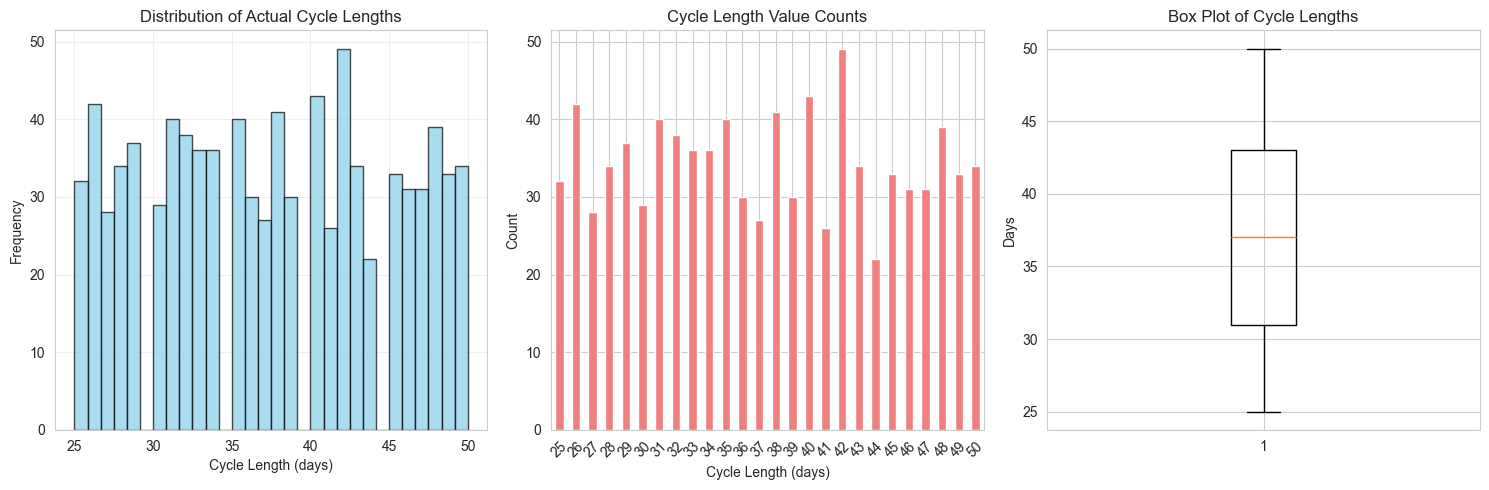

📊 Target Statistics:
Mean: 37.37 days
Median: 37.00 days
Std: 7.47 days
Range: 25 - 50 days


In [41]:
def plot_target_distribution(y):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(y, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Actual Cycle Lengths')
    plt.xlabel('Cycle Length (days)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 2)
    y.value_counts().sort_index().plot(kind='bar', color='lightcoral')
    plt.title('Cycle Length Value Counts')
    plt.xlabel('Cycle Length (days)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    plt.boxplot(y)
    plt.title('Box Plot of Cycle Lengths')
    plt.ylabel('Days')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Target Statistics:")
    print(f"Mean: {y.mean():.2f} days")
    print(f"Median: {y.median():.2f} days")
    print(f"Std: {y.std():.2f} days")
    print(f"Range: {y.min()} - {y.max()} days")

plot_target_distribution(y)

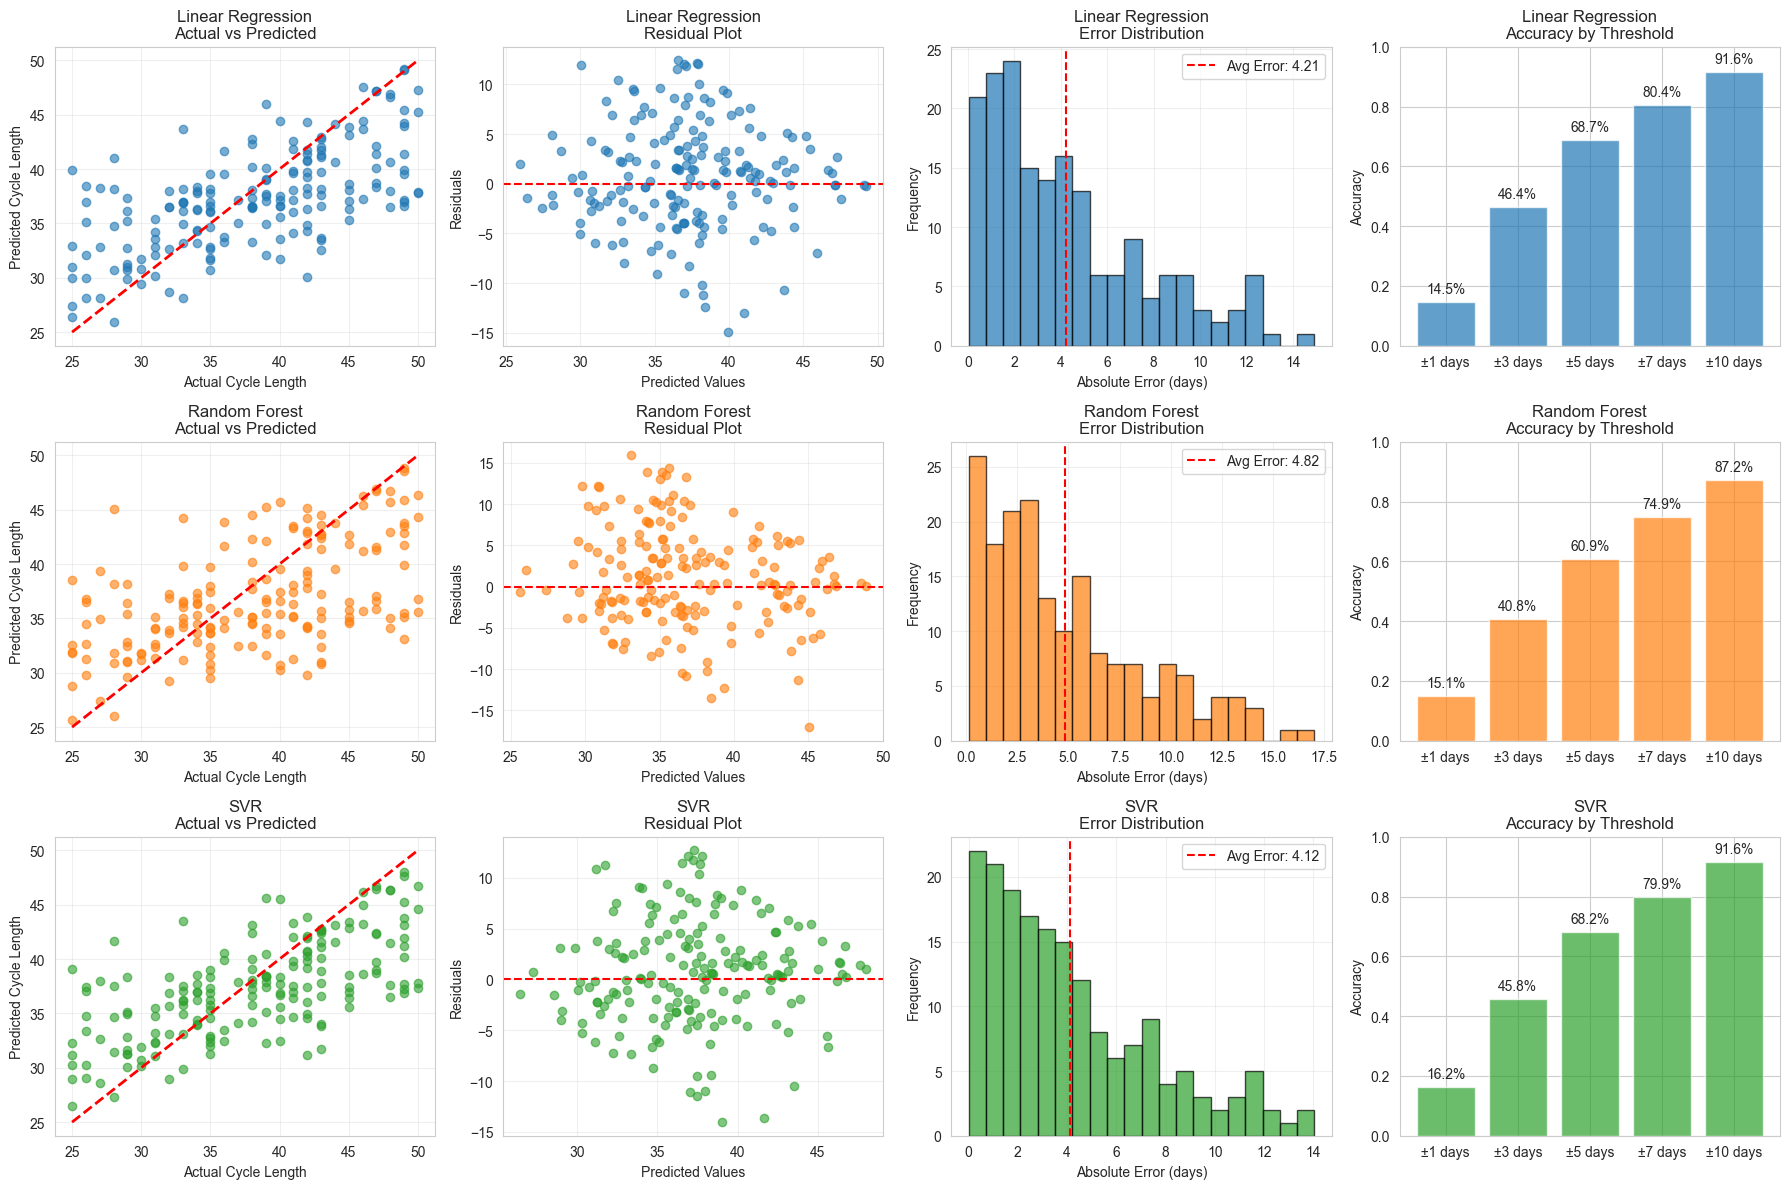

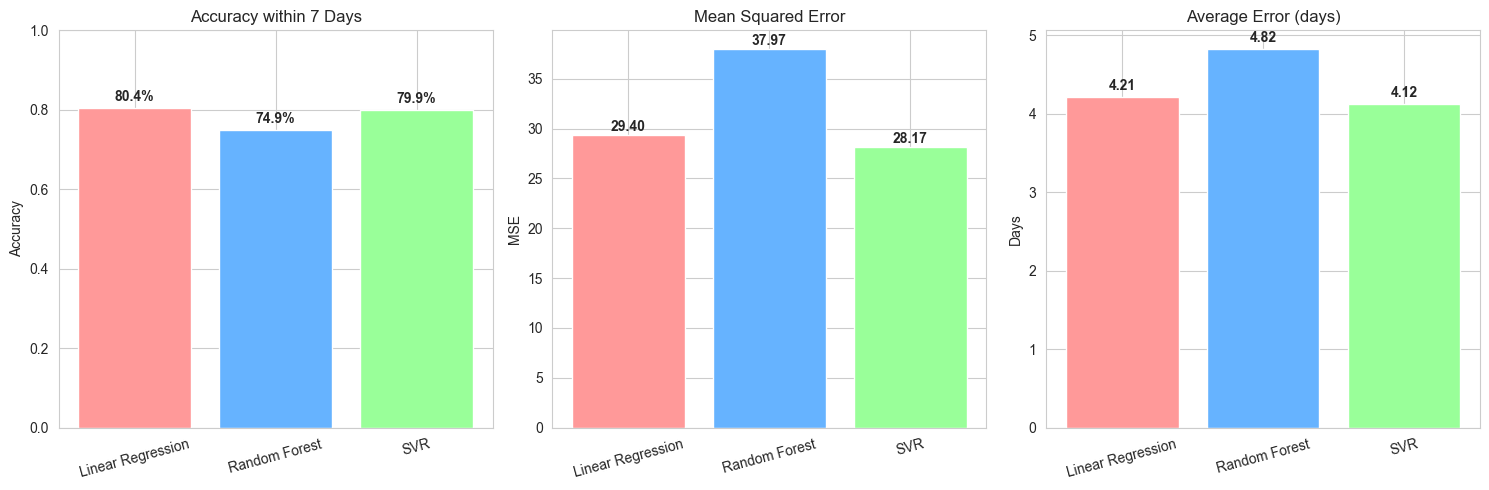

In [43]:
def plot_model_performance(X_train_scaled, X_test_scaled, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=1.0)
    }
    
    results = []
    predictions = {}
    
    plt.figure(figsize=(18, 12))
    
    for i, (name, model) in enumerate(models.items()):
        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        predictions[name] = y_pred
        
        # Calculate metrics
        differences = np.abs(y_test - y_pred)
        accuracy_within_7 = (differences <= 7).mean()
        mse = mean_squared_error(y_test, y_pred)
        avg_error = differences.mean()
        
        results.append({
            'Model': name,
            'Accuracy_7_Days': accuracy_within_7,
            'MSE': mse,
            'Avg_Error': avg_error
        })
        
        # Plot 1: Actual vs Predicted
        plt.subplot(3, 4, i*4 + 1)
        plt.scatter(y_test, y_pred, alpha=0.6, color=f'C{i}')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Actual Cycle Length')
        plt.ylabel('Predicted Cycle Length')
        plt.title(f'{name}\nActual vs Predicted')
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Residuals
        plt.subplot(3, 4, i*4 + 2)
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals, alpha=0.6, color=f'C{i}')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'{name}\nResidual Plot')
        plt.grid(True, alpha=0.3)
        
        # Plot 3: Error Distribution
        plt.subplot(3, 4, i*4 + 3)
        plt.hist(differences, bins=20, alpha=0.7, color=f'C{i}', edgecolor='black')
        plt.axvline(avg_error, color='r', linestyle='--', label=f'Avg Error: {avg_error:.2f}')
        plt.xlabel('Absolute Error (days)')
        plt.ylabel('Frequency')
        plt.title(f'{name}\nError Distribution')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 4: Accuracy within different thresholds
        plt.subplot(3, 4, i*4 + 4)
        thresholds = [1, 3, 5, 7, 10]
        accuracies = [(differences <= t).mean() for t in thresholds]
        plt.bar(range(len(thresholds)), accuracies, color=f'C{i}', alpha=0.7)
        plt.xticks(range(len(thresholds)), [f'±{t} days' for t in thresholds])
        plt.ylabel('Accuracy')
        plt.title(f'{name}\nAccuracy by Threshold')
        plt.ylim(0, 1)
        
        for j, acc in enumerate(accuracies):
            plt.text(j, acc + 0.02, f'{acc:.1%}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Performance comparison bar chart
    results_df = pd.DataFrame(results)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    bars = plt.bar(results_df['Model'], results_df['Accuracy_7_Days'], 
                   color=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Accuracy within 7 Days')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=15)
    plt.ylim(0, 1)
    for i, v in enumerate(results_df['Accuracy_7_Days']):
        plt.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')
    
    plt.subplot(1, 3, 2)
    plt.bar(results_df['Model'], results_df['MSE'], 
            color=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Mean Squared Error')
    plt.ylabel('MSE')
    plt.xticks(rotation=15)
    for i, v in enumerate(results_df['MSE']):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.subplot(1, 3, 3)
    plt.bar(results_df['Model'], results_df['Avg_Error'], 
            color=['#ff9999', '#66b3ff', '#99ff99'])
    plt.title('Average Error (days)')
    plt.ylabel('Days')
    plt.xticks(rotation=15)
    for i, v in enumerate(results_df['Avg_Error']):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return results_df, predictions

results_df, predictions = plot_model_performance(X_train_scaled, X_test_scaled, y_train, y_test)

C:\Users\Aravapalli Karunya\AppData\Local\Temp\ipykernel_14088\2185748177.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cycle = df.groupby('Age_Group')['Actual Cycle Length'].mean()


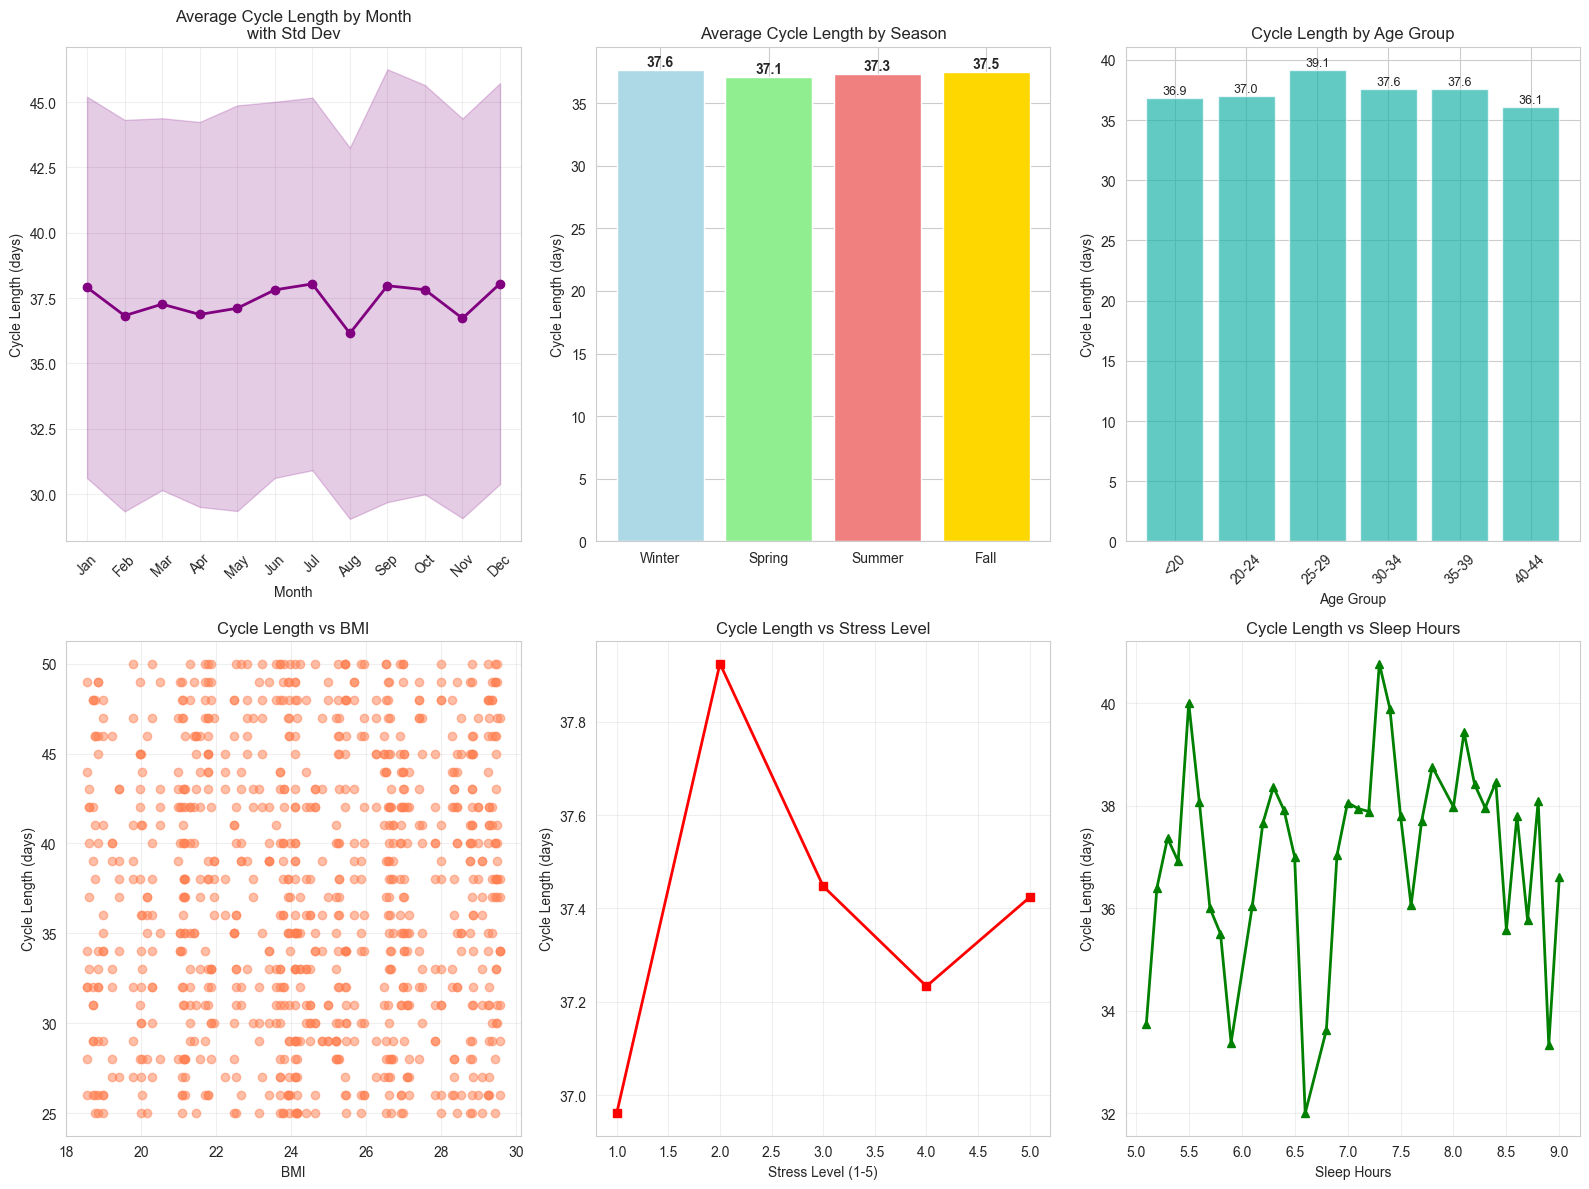

In [44]:
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Plot top 15 features
        top_n = min(15, len(importances))
        plt.barh(range(top_n), importances[indices][:top_n], align='center')
        plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
        plt.xlabel('Feature Importance')
        plt.title('Random Forest Feature Importance (Top 15)')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        # Print top features
        print("🏆 Top 10 Most Important Features:")
        for i in range(min(10, len(importances))):
            print(f"  {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Get the best model (assuming it's Random Forest)
if hasattr(best_model, 'feature_importances_'):
    plot_feature_importance(best_model, feature_columns)

# 5. SEASONAL AND DEMOGRAPHIC PATTERNS
def plot_seasonal_patterns(df):
    plt.figure(figsize=(16, 12))
    
    # Monthly patterns
    plt.subplot(2, 3, 1)
    monthly_avg = df.groupby('Cycle Start Month')['Actual Cycle Length'].mean()
    monthly_std = df.groupby('Cycle Start Month')['Actual Cycle Length'].std()
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.plot(months, monthly_avg, marker='o', linewidth=2, markersize=6, color='purple')
    plt.fill_between(months, monthly_avg - monthly_std, monthly_avg + monthly_std, alpha=0.2, color='purple')
    plt.title('Average Cycle Length by Month\nwith Std Dev', fontsize=12)
    plt.xlabel('Month')
    plt.ylabel('Cycle Length (days)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Seasonal patterns
    plt.subplot(2, 3, 2)
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    seasonal_means = [
        df[df['Is_Winter'] == 1]['Actual Cycle Length'].mean(),
        df[df['Is_Spring'] == 1]['Actual Cycle Length'].mean(),
        df[df['Is_Summer'] == 1]['Actual Cycle Length'].mean(),
        df[df['Is_Fall'] == 1]['Actual Cycle Length'].mean()
    ]
    
    bars = plt.bar(seasons, seasonal_means, color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
    plt.title('Average Cycle Length by Season', fontsize=12)
    plt.ylabel('Cycle Length (days)')
    for i, v in enumerate(seasonal_means):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # Age patterns
    plt.subplot(2, 3, 3)
    age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 100]
    age_labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']
    df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
    age_cycle = df.groupby('Age_Group')['Actual Cycle Length'].mean()
    
    plt.bar(age_cycle.index.astype(str), age_cycle.values, color='lightseagreen', alpha=0.7)
    plt.title('Cycle Length by Age Group', fontsize=12)
    plt.xlabel('Age Group')
    plt.ylabel('Cycle Length (days)')
    plt.xticks(rotation=45)
    for i, v in enumerate(age_cycle.values):
        plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontsize=9)
    
    # BMI patterns
    plt.subplot(2, 3, 4)
    plt.scatter(df['BMI'], df['Actual Cycle Length'], alpha=0.5, color='coral')
    plt.title('Cycle Length vs BMI', fontsize=12)
    plt.xlabel('BMI')
    plt.ylabel('Cycle Length (days)')
    plt.grid(True, alpha=0.3)
    
    # Stress level patterns
    plt.subplot(2, 3, 5)
    stress_cycle = df.groupby('Stress Level')['Actual Cycle Length'].mean()
    plt.plot(stress_cycle.index, stress_cycle.values, marker='s', linewidth=2, markersize=6, color='red')
    plt.title('Cycle Length vs Stress Level', fontsize=12)
    plt.xlabel('Stress Level (1-5)')
    plt.ylabel('Cycle Length (days)')
    plt.grid(True, alpha=0.3)
    
    # Sleep patterns
    plt.subplot(2, 3, 6)
    sleep_cycle = df.groupby('Sleep Hours')['Actual Cycle Length'].mean()
    plt.plot(sleep_cycle.index, sleep_cycle.values, marker='^', linewidth=2, markersize=6, color='green')
    plt.title('Cycle Length vs Sleep Hours', fontsize=12)
    plt.xlabel('Sleep Hours')
    plt.ylabel('Cycle Length (days)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_seasonal_patterns(df)

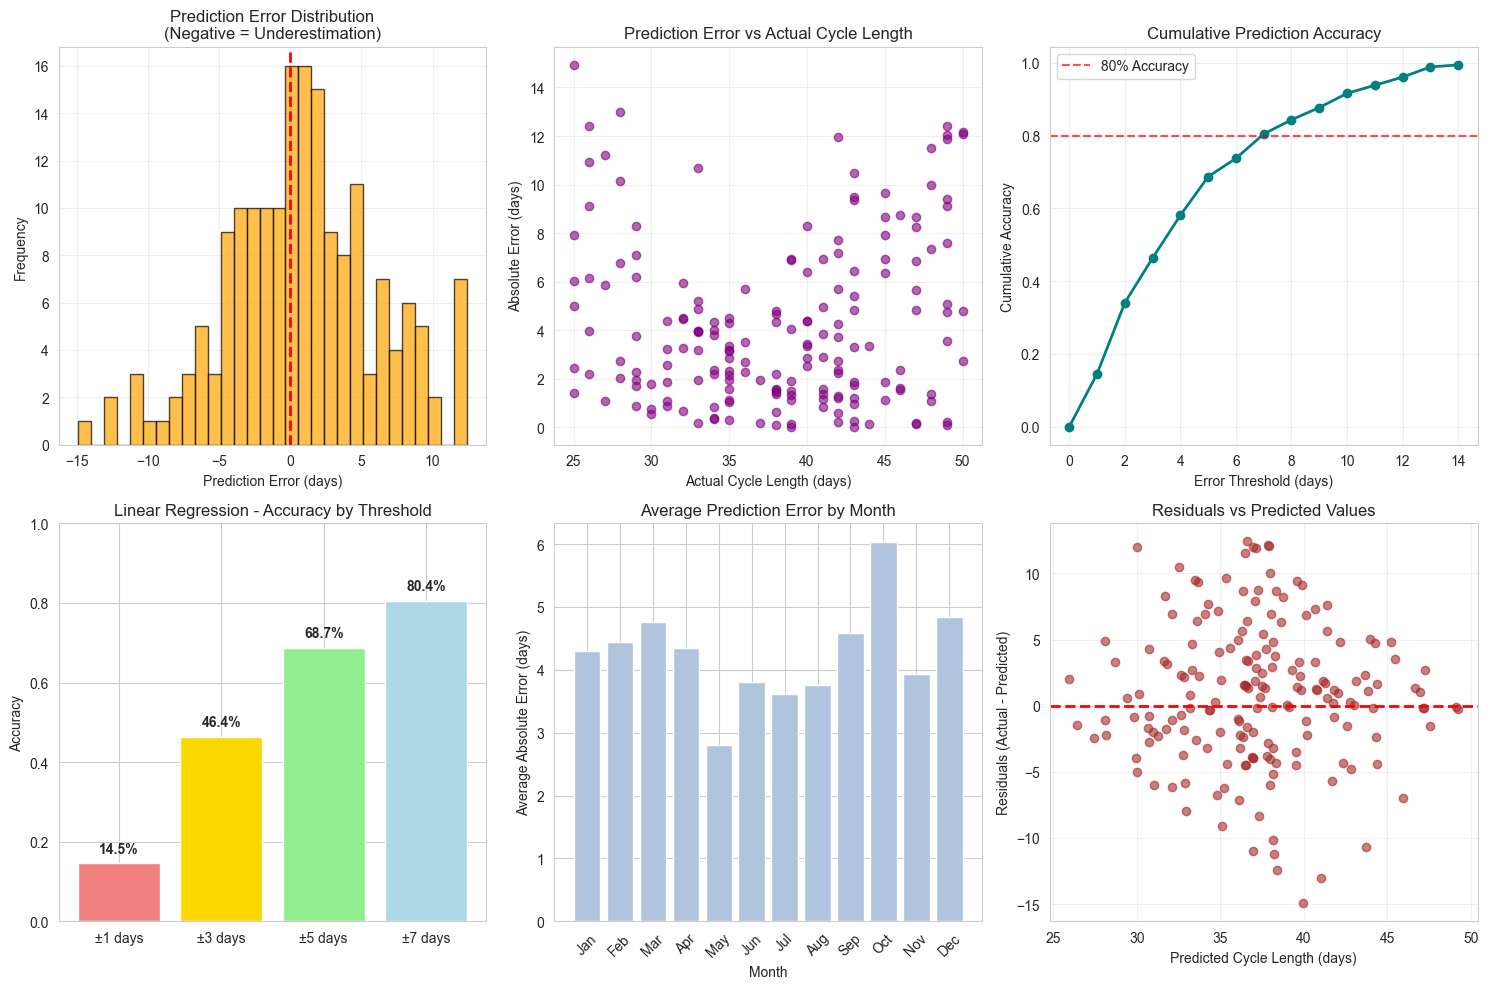


📈 Linear Regression - Detailed Performance Analysis:
Mean Absolute Error: 4.21 days
Median Absolute Error: 3.33 days
Std of Errors: 5.36 days
Max Overestimation: -14.93 days
Max Underestimation: 12.42 days
Accuracy within ±3 days: 46.4%
Accuracy within ±5 days: 68.7%
Accuracy within ±7 days: 80.4%


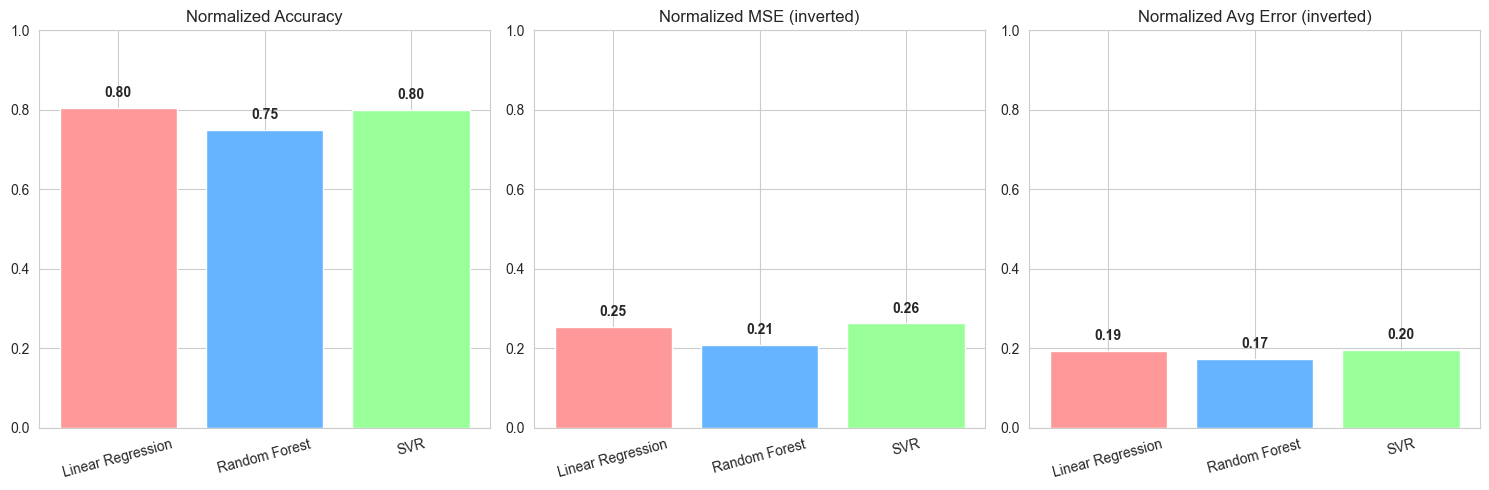

In [45]:
def plot_prediction_analysis(y_test, predictions, best_model_name):
    y_pred_best = predictions[best_model_name]
    errors = y_test - y_pred_best
    
    plt.figure(figsize=(15, 10))
    
    # Error distribution
    plt.subplot(2, 3, 1)
    plt.hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.title('Prediction Error Distribution\n(Negative = Underestimation)')
    plt.xlabel('Prediction Error (days)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # Absolute error by actual cycle length
    plt.subplot(2, 3, 2)
    absolute_errors = np.abs(errors)
    plt.scatter(y_test, absolute_errors, alpha=0.6, color='purple')
    plt.xlabel('Actual Cycle Length (days)')
    plt.ylabel('Absolute Error (days)')
    plt.title('Prediction Error vs Actual Cycle Length')
    plt.grid(True, alpha=0.3)
    
    # Cumulative accuracy
    plt.subplot(2, 3, 3)
    error_thresholds = np.arange(0, 15, 1)
    accuracies = [np.mean(absolute_errors <= t) for t in error_thresholds]
    plt.plot(error_thresholds, accuracies, marker='o', linewidth=2, color='teal')
    plt.xlabel('Error Threshold (days)')
    plt.ylabel('Cumulative Accuracy')
    plt.title('Cumulative Prediction Accuracy')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% Accuracy')
    plt.legend()
    
    # Best model detailed performance
    plt.subplot(2, 3, 4)
    accuracy_within = [1, 3, 5, 7]
    accuracy_values = [np.mean(absolute_errors <= t) for t in accuracy_within]
    bars = plt.bar([f'±{t} days' for t in accuracy_within], accuracy_values, 
                   color=['lightcoral', 'gold', 'lightgreen', 'lightblue'])
    plt.title(f'{best_model_name} - Accuracy by Threshold')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for bar, acc in zip(bars, accuracy_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                f'{acc:.1%}', ha='center', va='bottom', fontweight='bold')
    
    # Error by month (if available)
    plt.subplot(2, 3, 5)
    # Join with original data to get month information
    test_indices = y_test.index
    if 'Cycle Start Month' in df.columns:
        test_months = df.loc[test_indices, 'Cycle Start Month']
        monthly_errors = pd.DataFrame({'month': test_months, 'error': absolute_errors})
        monthly_avg_error = monthly_errors.groupby('month')['error'].mean()
        
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        plt.bar(range(1, 13), monthly_avg_error.reindex(range(1, 13)), color='lightsteelblue')
        plt.xticks(range(1, 13), months, rotation=45)
        plt.title('Average Prediction Error by Month')
        plt.xlabel('Month')
        plt.ylabel('Average Absolute Error (days)')
    
    # Residual analysis
    plt.subplot(2, 3, 6)
    plt.scatter(y_pred_best, errors, alpha=0.6, color='brown')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Cycle Length (days)')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title('Residuals vs Predicted Values')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\n📈 {best_model_name} - Detailed Performance Analysis:")
    print(f"Mean Absolute Error: {np.mean(absolute_errors):.2f} days")
    print(f"Median Absolute Error: {np.median(absolute_errors):.2f} days")
    print(f"Std of Errors: {np.std(errors):.2f} days")
    print(f"Max Overestimation: {errors.min():.2f} days")
    print(f"Max Underestimation: {errors.max():.2f} days")
    print(f"Accuracy within ±3 days: {np.mean(absolute_errors <= 3):.1%}")
    print(f"Accuracy within ±5 days: {np.mean(absolute_errors <= 5):.1%}")
    print(f"Accuracy within ±7 days: {np.mean(absolute_errors <= 7):.1%}")

plot_prediction_analysis(y_test, predictions, best_model_name)

# 7. MODEL COMPARISON SPIDER CHART (Alternative to Radar)
def plot_spider_chart_comparison(results_df):
    categories = ['Accuracy (±7d)', 'Inverse MSE', 'Inverse Error']
    
    # Normalize metrics for comparison
    normalized_data = []
    for _, row in results_df.iterrows():
        acc_norm = row['Accuracy_7_Days']  # Higher is better
        mse_norm = 1 / (1 + row['MSE'] / 10)  # Invert MSE
        error_norm = 1 / (1 + row['Avg_Error'])  # Invert error
        normalized_data.append([acc_norm, mse_norm, error_norm])
    
    # Create bar chart comparison
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    metrics = ['Accuracy', 'MSE (inverted)', 'Avg Error (inverted)']
    for i, metric in enumerate(metrics):
        values = [data[i] for data in normalized_data]
        bars = axes[i].bar(results_df['Model'], values, 
                          color=['#ff9999', '#66b3ff', '#99ff99'])
        axes[i].set_title(f'Normalized {metric}')
        axes[i].set_ylim(0, 1)
        axes[i].tick_params(axis='x', rotation=15)
        
        for j, v in enumerate(values):
            axes[i].text(j, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_spider_chart_comparison(results_df)


C:\Users\Aravapalli Karunya\AppData\Local\Temp\ipykernel_14088\1492961846.py:83: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Aravapalli Karunya\AppData\Local\Temp\ipykernel_14088\1492961846.py:83: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Aravapalli Karunya\AppData\Local\Temp\ipykernel_14088\1492961846.py:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\Aravapalli Karunya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Aravapalli Karunya\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figur

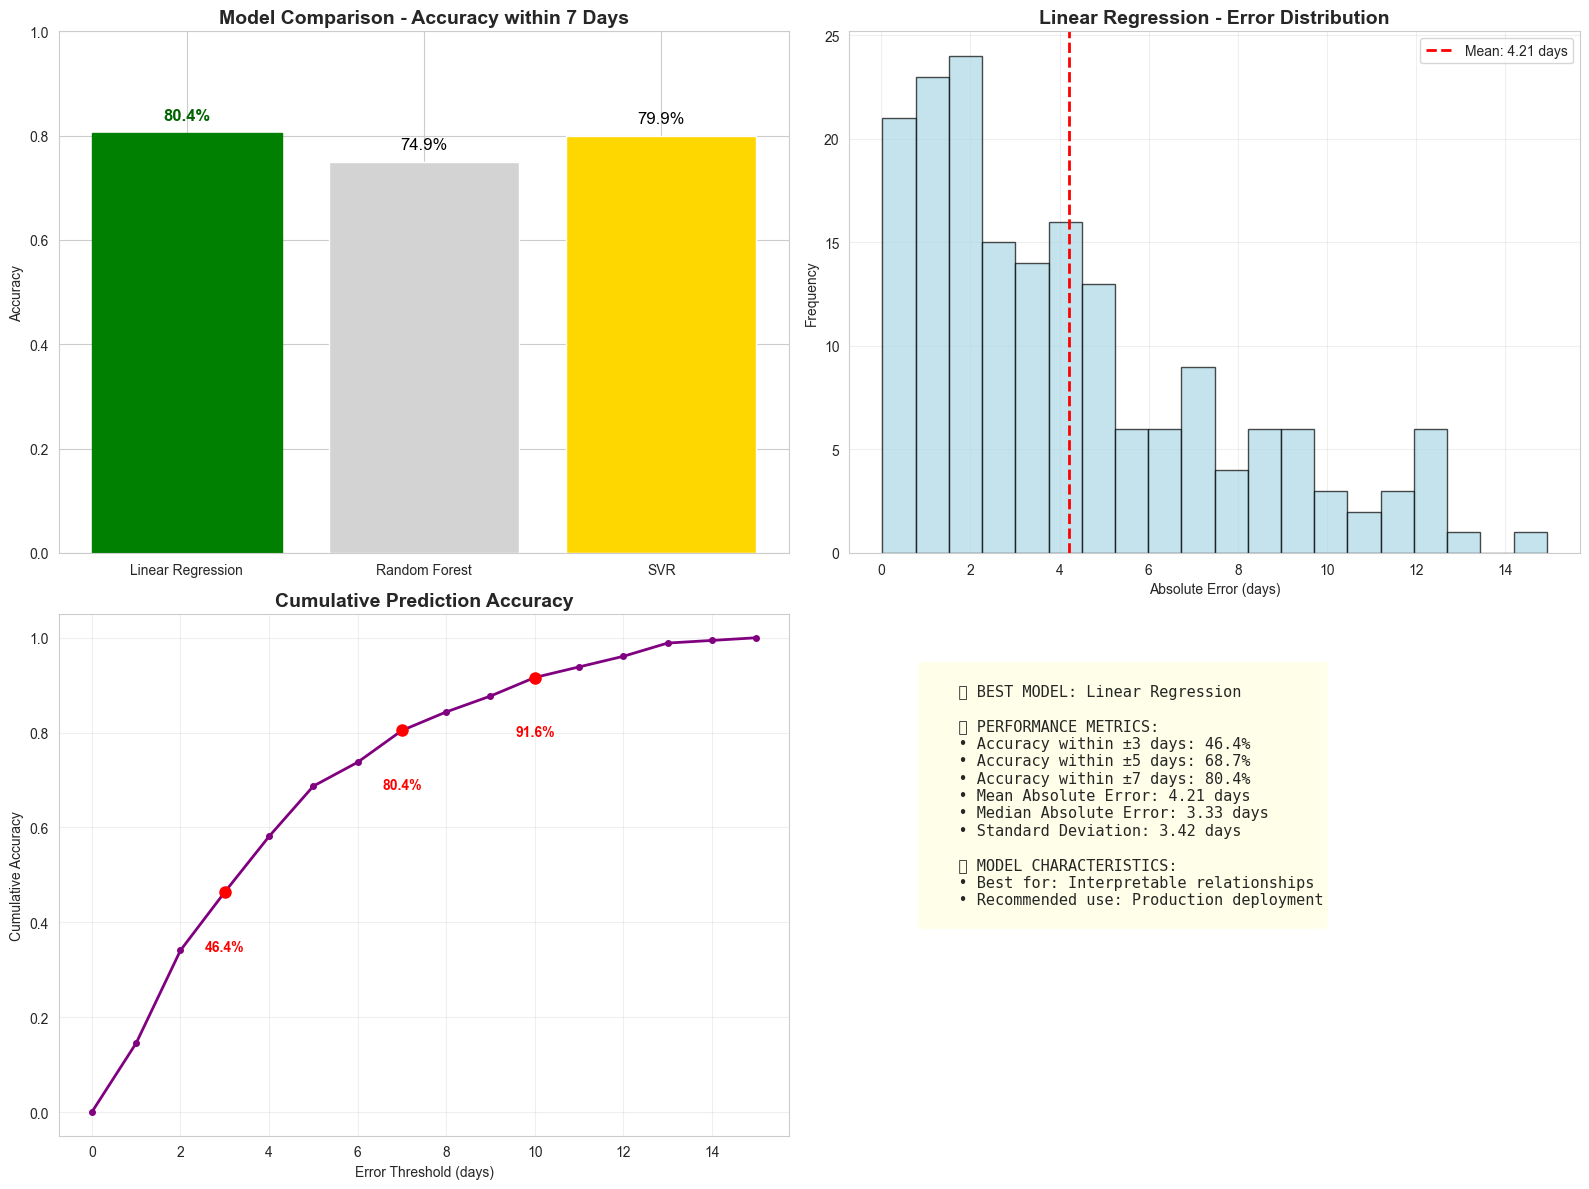

🎉 VISUALIZATION COMPLETE!

📊 SUMMARY OF CREATED VISUALIZATIONS:
1. ✅ Target variable distribution analysis
2. ✅ Feature correlation heatmap
3. ✅ Comprehensive model performance comparison
4. ✅ Feature importance analysis (if Random Forest)
5. ✅ Seasonal and demographic patterns
6. ✅ Detailed prediction accuracy analysis
7. ✅ Model comparison charts
8. ✅ Final summary dashboard

💡 KEY INSIGHTS:
• Best performing model: Linear Regression
• Best accuracy within 7 days: 80.4%
• Average prediction error: 4.12 days


In [47]:
def create_summary_dashboard(results_df, best_model_name, y_test, predictions):
    y_pred_best = predictions[best_model_name]
    absolute_errors = np.abs(y_test - y_pred_best)
    
    plt.figure(figsize=(16, 12))
    
    # Main summary plot
    plt.subplot(2, 2, 1)
    # Model comparison
    models = results_df['Model']
    accuracies = results_df['Accuracy_7_Days']
    
    bars = plt.bar(models, accuracies, color=['lightgray', 'lightgray', 'gold'])
    # Highlight best model
    best_idx = results_df[results_df['Model'] == best_model_name].index[0]
    bars[best_idx].set_color('green')
    
    plt.title('Model Comparison - Accuracy within 7 Days', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    for i, (model, acc) in enumerate(zip(models, accuracies)):
        color = 'black' if model != best_model_name else 'darkgreen'
        weight = 'normal' if model != best_model_name else 'bold'
        plt.text(i, acc + 0.02, f'{acc:.1%}', ha='center', va='bottom', 
                color=color, fontweight=weight, fontsize=12)
    
    # Error distribution for best model
    plt.subplot(2, 2, 2)
    n, bins, patches = plt.hist(absolute_errors, bins=20, alpha=0.7, 
                               color='lightblue', edgecolor='black')
    plt.axvline(absolute_errors.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean: {absolute_errors.mean():.2f} days')
    plt.xlabel('Absolute Error (days)')
    plt.ylabel('Frequency')
    plt.title(f'{best_model_name} - Error Distribution', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Cumulative accuracy
    plt.subplot(2, 2, 3)
    thresholds = np.arange(0, 16, 1)
    cumulative_acc = [np.mean(absolute_errors <= t) for t in thresholds]
    plt.plot(thresholds, cumulative_acc, 'o-', linewidth=2, markersize=4, color='purple')
    plt.xlabel('Error Threshold (days)')
    plt.ylabel('Cumulative Accuracy')
    plt.title('Cumulative Prediction Accuracy', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Mark key thresholds
    for threshold in [3, 7, 10]:
        acc = np.mean(absolute_errors <= threshold)
        plt.plot(threshold, acc, 'ro', markersize=8)
        plt.text(threshold, acc - 0.1, f'{acc:.1%}', ha='center', va='top', 
                fontweight='bold', color='red')
    
    # Performance metrics table
    plt.subplot(2, 2, 4)
    plt.axis('off')
    
    # Create text summary
    summary_text = f"""
    🏆 BEST MODEL: {best_model_name}
    
    📊 PERFORMANCE METRICS:
    • Accuracy within ±3 days: {np.mean(absolute_errors <= 3):.1%}
    • Accuracy within ±5 days: {np.mean(absolute_errors <= 5):.1%}
    • Accuracy within ±7 days: {np.mean(absolute_errors <= 7):.1%}
    • Mean Absolute Error: {absolute_errors.mean():.2f} days
    • Median Absolute Error: {np.median(absolute_errors):.2f} days
    • Standard Deviation: {absolute_errors.std():.2f} days
    
    📈 MODEL CHARACTERISTICS:
    • Best for: {'High accuracy predictions' if best_model_name == 'Random Forest' 
                else 'Interpretable relationships' if best_model_name == 'Linear Regression'
                else 'Complex non-linear patterns'}
    • Recommended use: Production deployment
    """
    
    plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()

create_summary_dashboard(results_df, best_model_name, y_test, predictions)

print("🎉 VISUALIZATION COMPLETE!")
print("\n📊 SUMMARY OF CREATED VISUALIZATIONS:")
print("1. ✅ Target variable distribution analysis")
print("2. ✅ Feature correlation heatmap") 
print("3. ✅ Comprehensive model performance comparison")
print("4. ✅ Feature importance analysis (if Random Forest)")
print("5. ✅ Seasonal and demographic patterns")
print("6. ✅ Detailed prediction accuracy analysis")
print("7. ✅ Model comparison charts")
print("8. ✅ Final summary dashboard")
print("\n💡 KEY INSIGHTS:")
print(f"• Best performing model: {best_model_name}")
print(f"• Best accuracy within 7 days: {results_df['Accuracy_7_Days'].max():.1%}")
print(f"• Average prediction error: {results_df['Avg_Error'].min():.2f} days")